## Human_resource.csv

In [88]:
#Libraries
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

import pickle

In [15]:
### Dataset load
datafile = pd.read_csv("E:/ONLINE COURSES/Side projects/MY PROJECT/Datasets/Human_Resources.csv")

In [16]:
df = datafile.copy()

In [17]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [18]:
# Datafile Exploration
pd.set_option('display.max_columns', None)
df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [20]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [21]:
# NA values check
df.isnull().sum()  

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

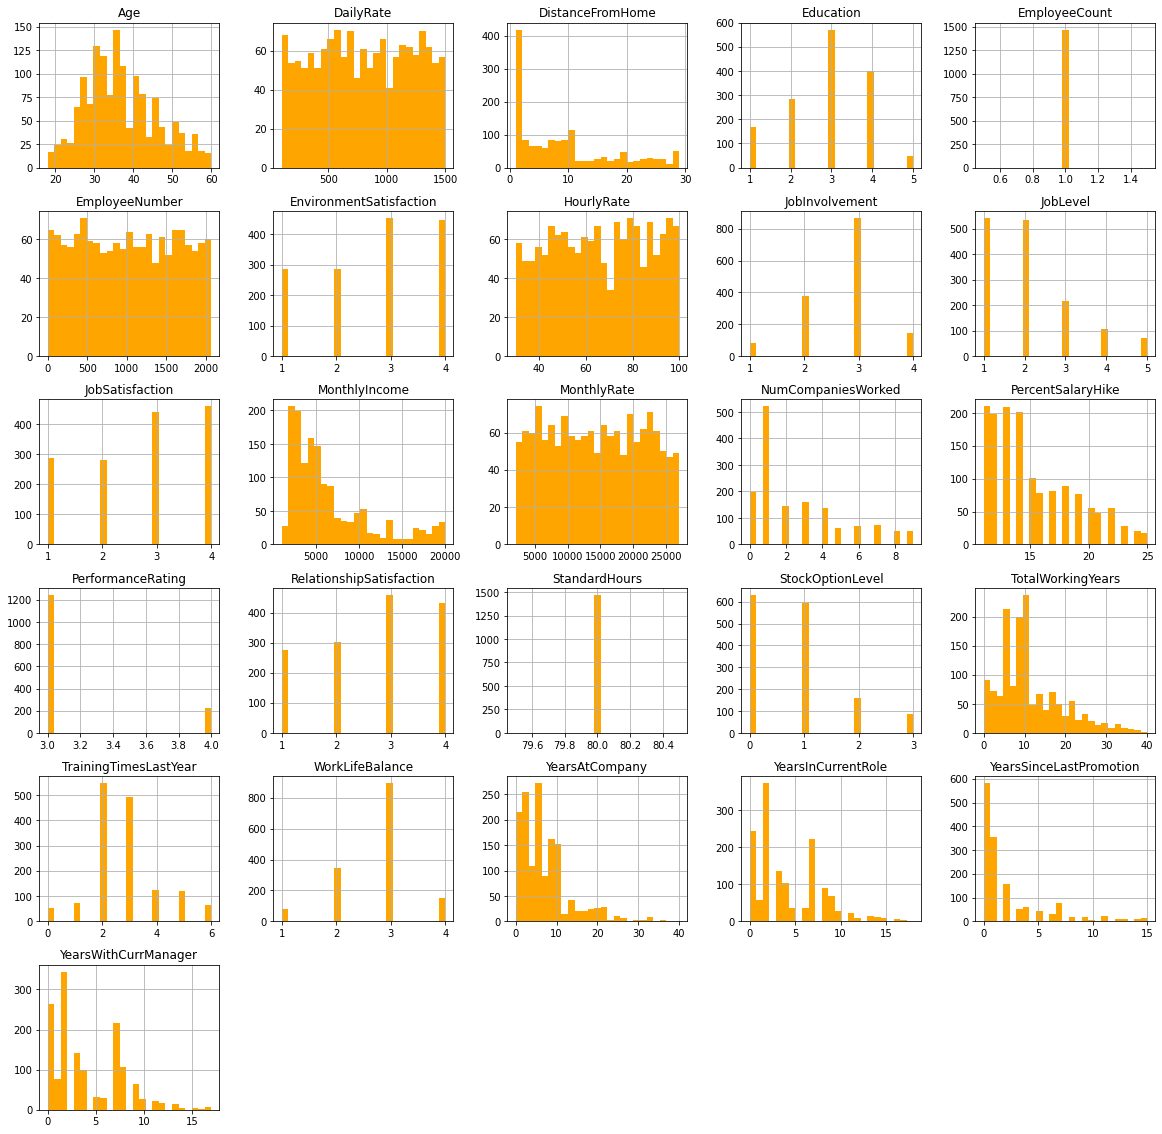

In [22]:
# Numerical Variable distribution
df.hist(bins = 25, figsize = (20,20), color  = "orange")
plt.show()

In [23]:
# Non_numeric variable distribution
print(pd.crosstab(df.Attrition, "count" ))
print(pd.crosstab(df.BusinessTravel, "count" ))
print(pd.crosstab(df.Department, "count" ))
print(pd.crosstab(df.EducationField, "count" ))
print(pd.crosstab(df.Gender, "count" ))
print(pd.crosstab(df.JobRole, "count" ))
print(pd.crosstab(df.MaritalStatus, "count" ))
print(pd.crosstab(df.Over18, "count" ))
print(pd.crosstab(df.OverTime, "count" ))

col_0      count
Attrition       
No          1233
Yes          237
col_0              count
BusinessTravel          
Non-Travel           150
Travel_Frequently    277
Travel_Rarely       1043
col_0                   count
Department                   
Human Resources            63
Research & Development    961
Sales                     446
col_0             count
EducationField         
Human Resources      27
Life Sciences       606
Marketing           159
Medical             464
Other                82
Technical Degree    132
col_0   count
Gender       
Female    588
Male      882
col_0                      count
JobRole                         
Healthcare Representative    131
Human Resources               52
Laboratory Technician        259
Manager                      102
Manufacturing Director       145
Research Director             80
Research Scientist           292
Sales Executive              326
Sales Representative          83
col_0          count
MaritalStatus       
Divo

### EDA(Feature Engineering and Feature selection)

In [24]:
# Unnecessary variable to drop
df.drop(["EmployeeCount", "StandardHours", "Over18","EmployeeNumber", "HourlyRate","MonthlyRate","PerformanceRating"],
        axis = 1,inplace = True)

In [12]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,3,2,Sales Executive,4,Single,5993,8,Yes,11,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,2,2,Research Scientist,2,Married,5130,1,No,23,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,2,1,Laboratory Technician,3,Single,2090,6,Yes,15,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,3,1,Research Scientist,3,Married,2909,1,Yes,11,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,3,1,Laboratory Technician,2,Married,3468,9,No,12,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,4,2,Laboratory Technician,4,Married,2571,4,No,17,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,2,3,Healthcare Representative,1,Married,9991,4,No,15,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,4,2,Manufacturing Director,2,Married,6142,1,Yes,20,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,2,2,Sales Executive,2,Married,5390,2,No,14,4,0,17,3,2,9,6,0,8


In [25]:
# Label encoding
df.Attrition = df.Attrition.apply(lambda x: 1 if x == "Yes" else 0)

In [26]:
df.Gender = df.Gender.apply(lambda x: 1 if x == "Male" else 0)

In [27]:
df.OverTime = df.OverTime.apply(lambda x: 1 if x == "Yes" else 0)

col_0      count
Attrition       
0           1233
1            237
The percentage of attrition is 16.1%


F:\SOFTWARES\Installed files\PYTHON\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


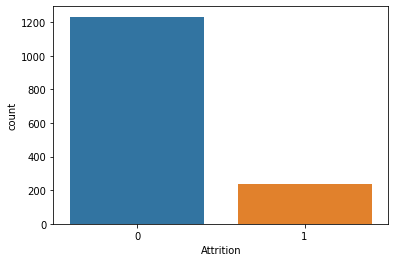

In [28]:
a = pd.crosstab(df.Attrition, "count")
print(a)
print(f"The percentage of attrition is {round(23700/1470,1)}%")

sns.countplot(df.Attrition)
plt.show()

# Unbalanced dataset since the no. of positive labels of attrition is low to train the model effectively.

In [29]:
# Separation of the attrition to study their summary, the possible factors for leaving the company.
df_stayed = df[df.Attrition == 0]
df_left = df[df.Attrition == 1]

In [18]:
df_stayed

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,1,2,2,Research Scientist,2,Married,5130,1,0,23,4,1,10,3,3,10,7,1,7
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,0,3,1,Research Scientist,3,Married,2909,1,1,11,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,3,1,Laboratory Technician,2,Married,3468,9,0,12,4,1,6,3,3,2,2,2,2
5,32,0,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,4,1,3,1,Laboratory Technician,4,Single,3068,0,0,13,3,0,8,2,2,7,7,3,6
6,59,0,Travel_Rarely,1324,Research & Development,3,3,Medical,3,0,4,1,Laboratory Technician,1,Married,2670,4,1,20,1,3,12,3,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,Travel_Frequently,884,Research & Development,23,2,Medical,3,1,4,2,Laboratory Technician,4,Married,2571,4,0,17,3,1,17,3,3,5,2,0,3
1466,39,0,Travel_Rarely,613,Research & Development,6,1,Medical,4,1,2,3,Healthcare Representative,1,Married,9991,4,0,15,1,1,9,5,3,7,7,1,7
1467,27,0,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,1,4,2,Manufacturing Director,2,Married,6142,1,1,20,2,1,6,0,3,6,2,0,3
1468,49,0,Travel_Frequently,1023,Sales,2,3,Medical,4,1,2,2,Sales Executive,2,Married,5390,2,0,14,4,0,17,3,2,9,6,0,8


In [30]:
df_left

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,0,3,2,Sales Executive,4,Single,5993,8,1,11,1,0,8,0,1,6,4,0,5
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,1,2,1,Laboratory Technician,3,Single,2090,6,1,15,2,0,7,3,3,0,0,0,0
14,28,1,Travel_Rarely,103,Research & Development,24,3,Life Sciences,3,1,2,1,Laboratory Technician,3,Single,2028,5,1,14,2,0,6,4,3,4,2,0,3
21,36,1,Travel_Rarely,1218,Sales,9,4,Life Sciences,3,1,2,1,Sales Representative,1,Single,3407,7,0,23,2,0,10,4,3,5,3,0,3
24,34,1,Travel_Rarely,699,Research & Development,6,1,Medical,2,1,3,1,Research Scientist,1,Single,2960,2,0,11,3,0,8,2,3,4,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,23,1,Travel_Frequently,638,Sales,9,3,Marketing,4,1,3,1,Sales Representative,1,Married,1790,1,0,19,1,1,1,3,2,1,0,1,0
1442,29,1,Travel_Rarely,1092,Research & Development,1,4,Medical,1,1,3,1,Research Scientist,4,Married,4787,9,1,14,2,3,4,3,4,2,2,2,2
1444,56,1,Travel_Rarely,310,Research & Development,7,2,Technical Degree,4,1,3,1,Laboratory Technician,3,Married,2339,8,0,11,4,1,14,4,1,10,9,9,8
1452,50,1,Travel_Frequently,878,Sales,1,4,Life Sciences,2,1,3,2,Sales Executive,3,Divorced,6728,7,0,12,4,2,12,3,3,6,3,0,1


In [31]:
df_stayed.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.00000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,0.593674,2.770479,2.145985,2.778589,6832.739659,2.64558,0.234388,15.231144,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,0.491346,0.692050,1.117933,1.093277,4818.208001,2.46009,0.423787,3.639511,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1051.000000,0.00000,0.000000,11.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,0.000000,2.000000,1.000000,2.000000,3211.000000,1.00000,0.000000,12.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,5204.000000,2.00000,0.000000,14.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,1.000000,3.000000,3.000000,4.000000,8834.000000,4.00000,0.000000,18.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,1.000000,4.000000,5.000000,4.000000,19999.000000,9.00000,1.000000,25.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


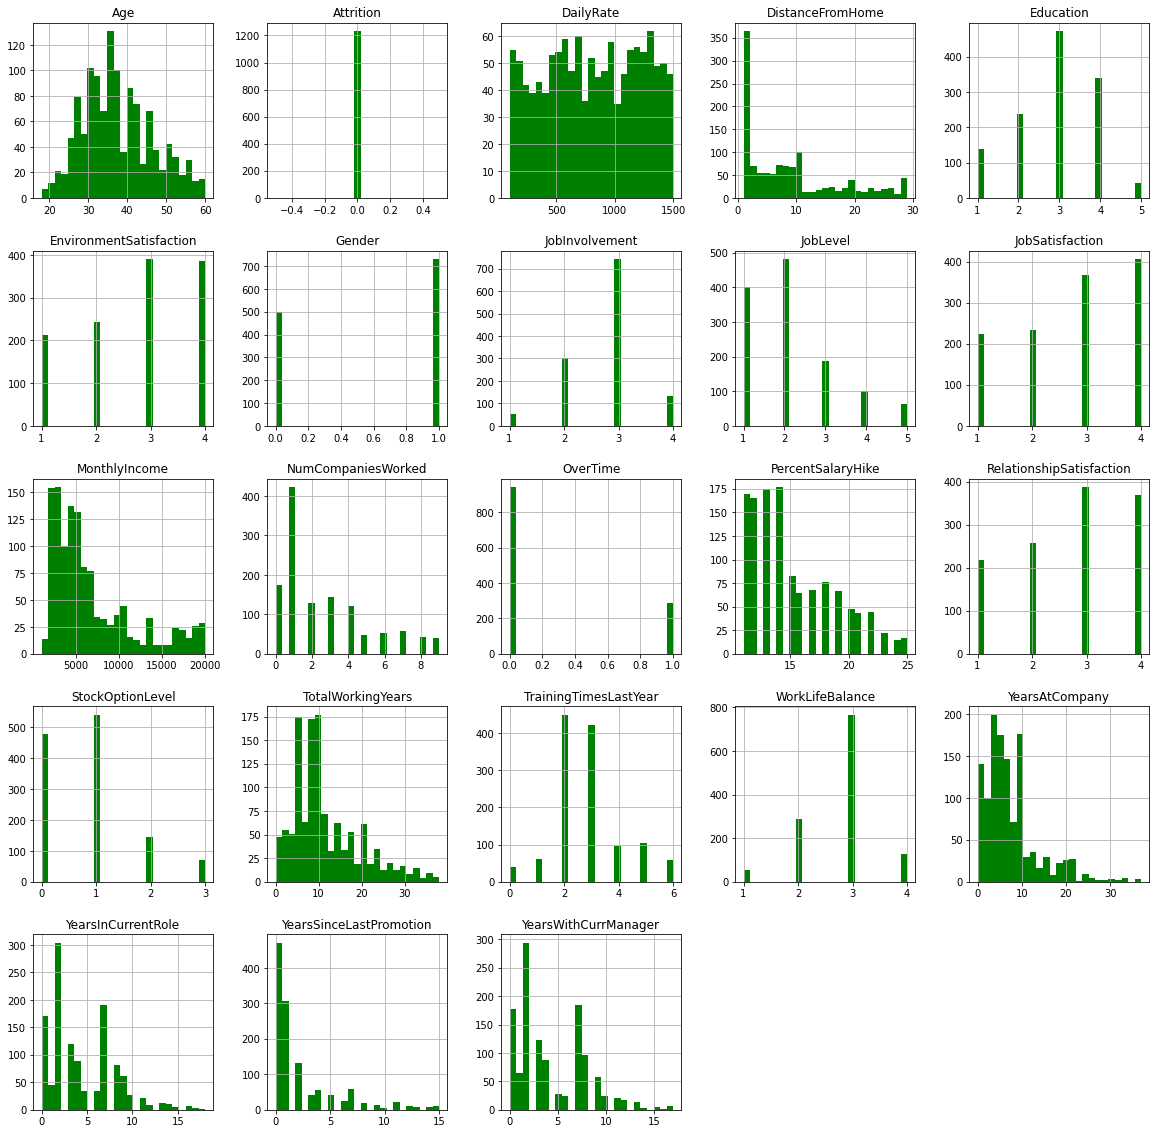

In [32]:
df_stayed.hist(bins = 25, figsize= (20,20), color = "green")
plt.show()

In [33]:
df_left.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,0.632911,2.518987,1.637131,2.468354,4787.092827,2.940928,0.535865,15.097046,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,0.483031,0.773405,0.940594,1.118058,3640.210367,2.678519,0.499768,3.770294,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,0.000000,11.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,0.000000,2.000000,1.000000,1.000000,2373.000000,1.000000,0.000000,12.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,1.000000,3.000000,1.000000,3.000000,3202.000000,1.000000,1.000000,14.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,1.000000,3.000000,2.000000,3.000000,5916.000000,5.000000,1.000000,17.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,1.000000,4.000000,5.000000,4.000000,19859.000000,9.000000,1.000000,25.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


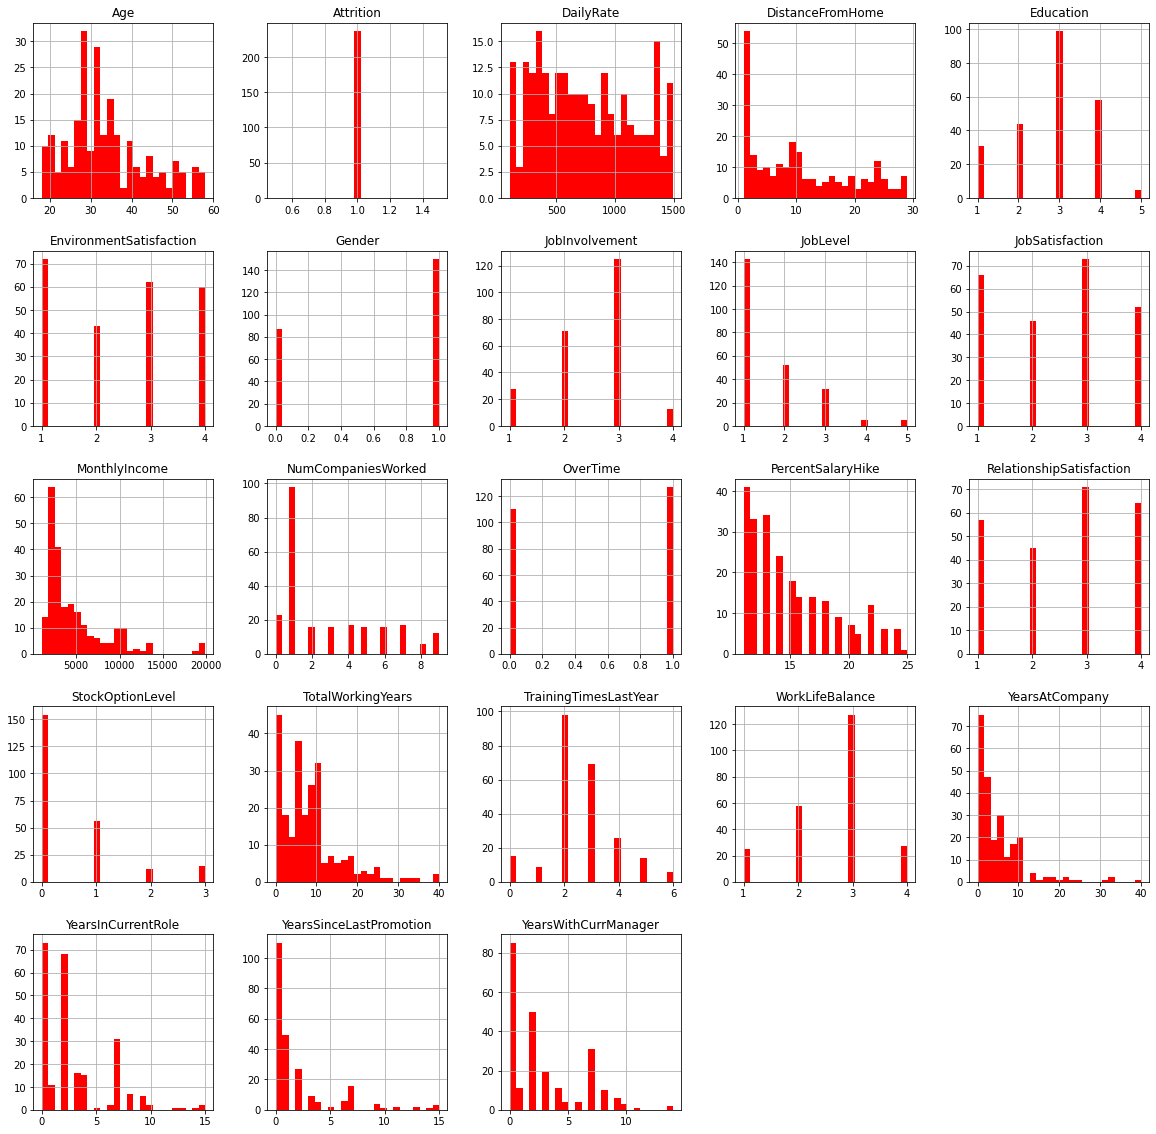

In [34]:
df_left.hist(bins = 25, figsize= (20,20), color = "red")
plt.show()

Initial observations about employees who left the company:

1. Age: Mean age of 33.6, thus younger people.
2. Job Level: Employees with job level 1 tends to leave the company.
3. Monthly income: Mean of employess leaving is 4787 which is less compared to the people who stays in the company.
4. Over Time: Employees working overtime tends to leave the company, maybe because of over-work pressure.
5. Stock Option : Holding no stock in the company makes it easier to leave the company.

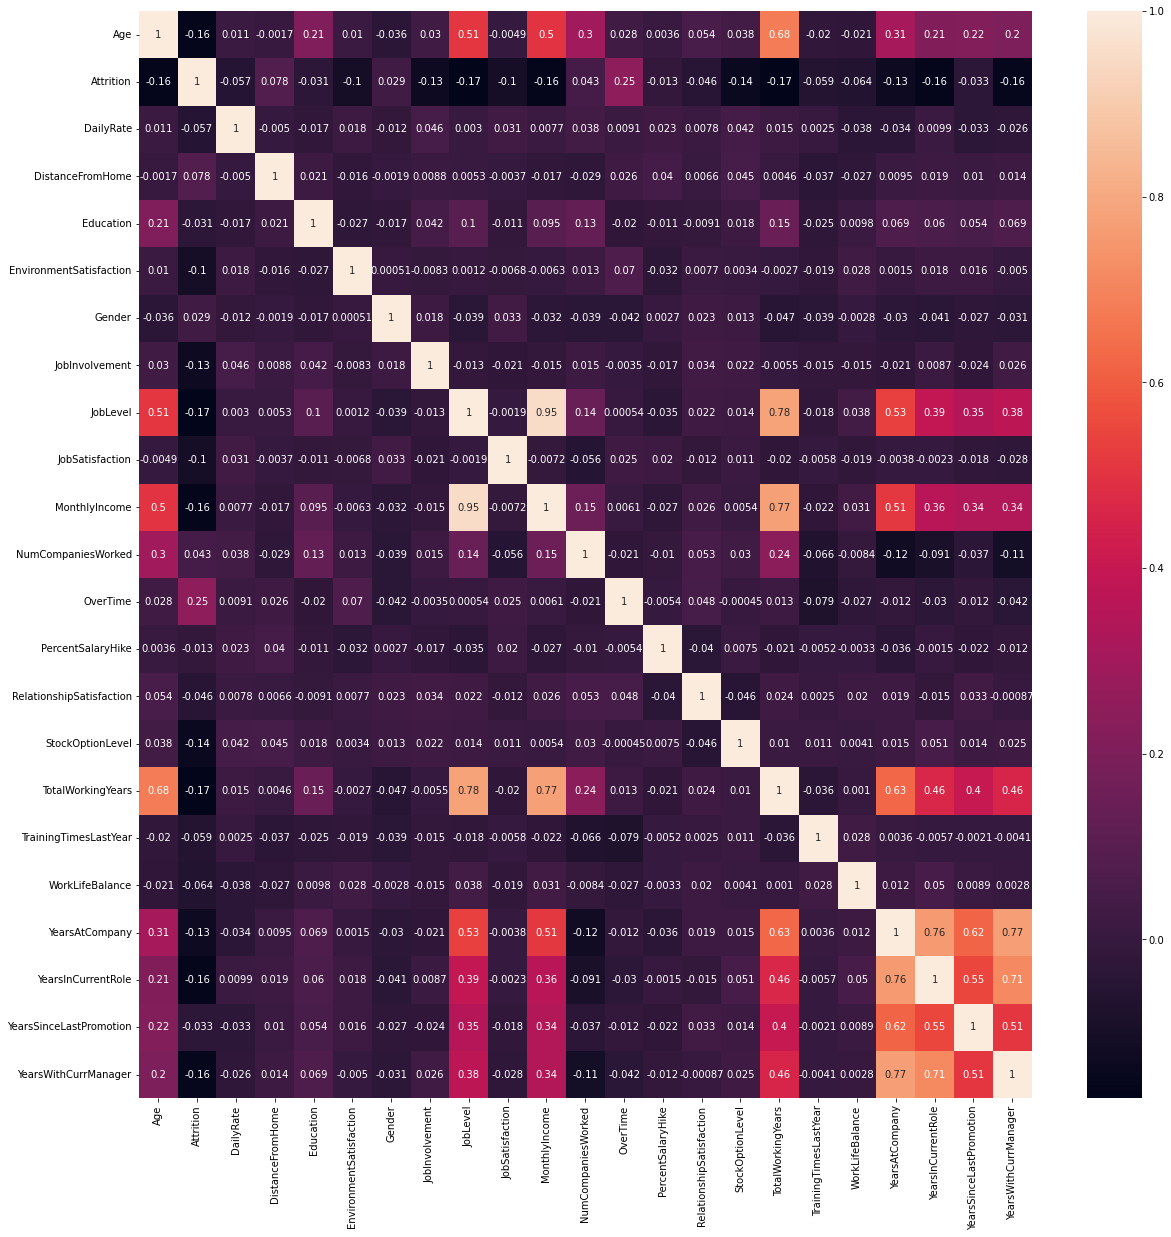

In [35]:
# Correlation graph
correlations = df.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)
plt.show()

The following features are strongly positively related:
1. Total working hours and job level
2. Total working hours and Monthly Incomes
3. Percantage salary hike and performance rating
4. Years at current company with years in current role, years with current manager and years since last promotion

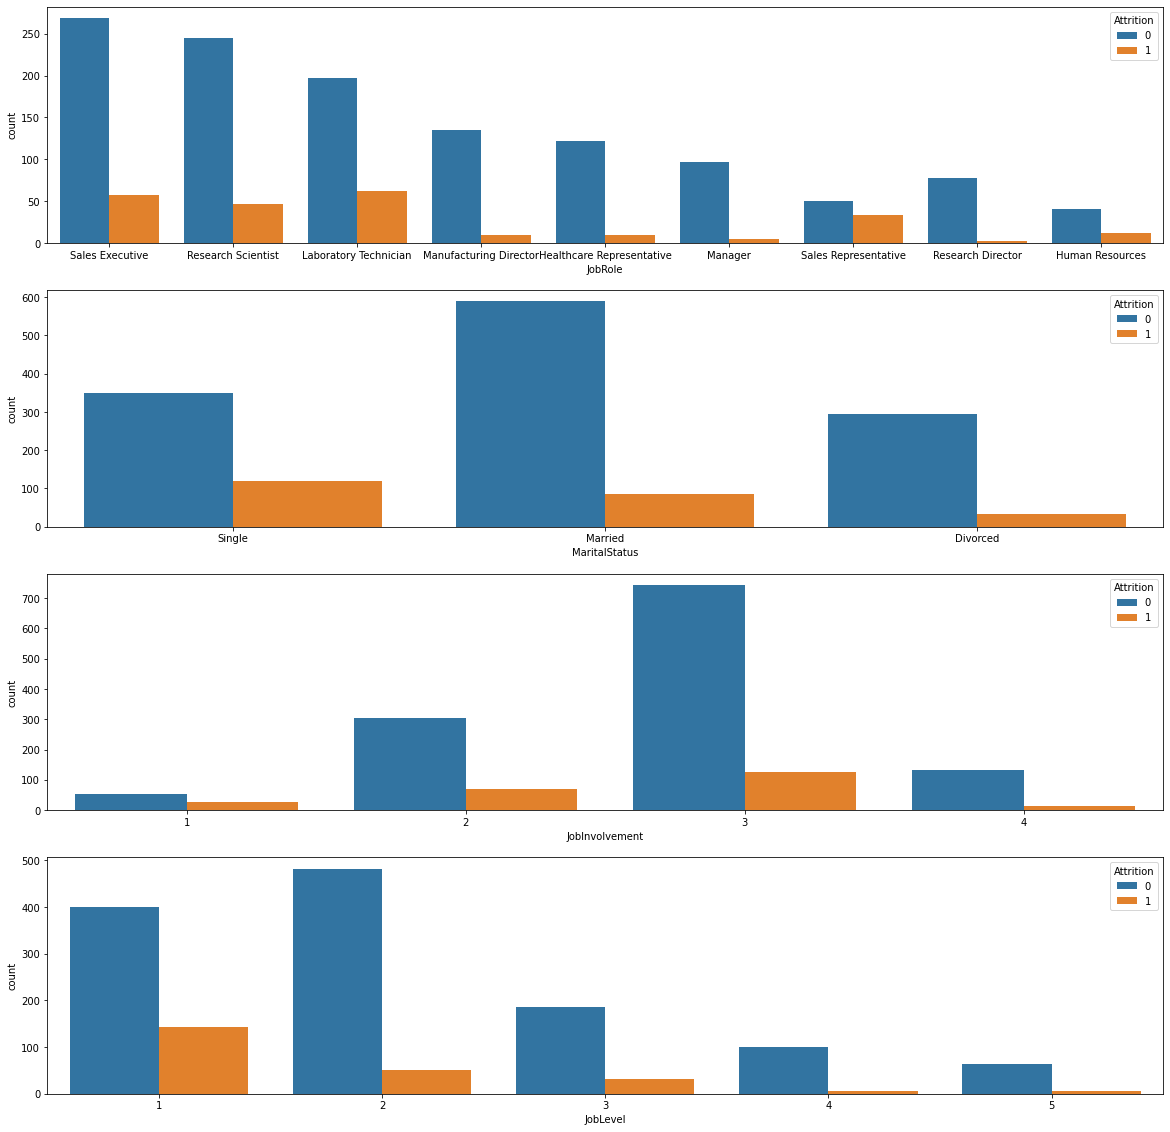

In [36]:
# Distribution of target variables among the discrete features variables

plt.figure(figsize=[20,20])
plt.subplot(411)
sns.countplot(x = 'JobRole', hue = 'Attrition', data = df)
plt.subplot(412)
sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data = df)
plt.subplot(413)
sns.countplot(x = 'JobInvolvement', hue = 'Attrition', data = df)
plt.subplot(414)
sns.countplot(x = 'JobLevel', hue = 'Attrition', data = df)
plt.show()

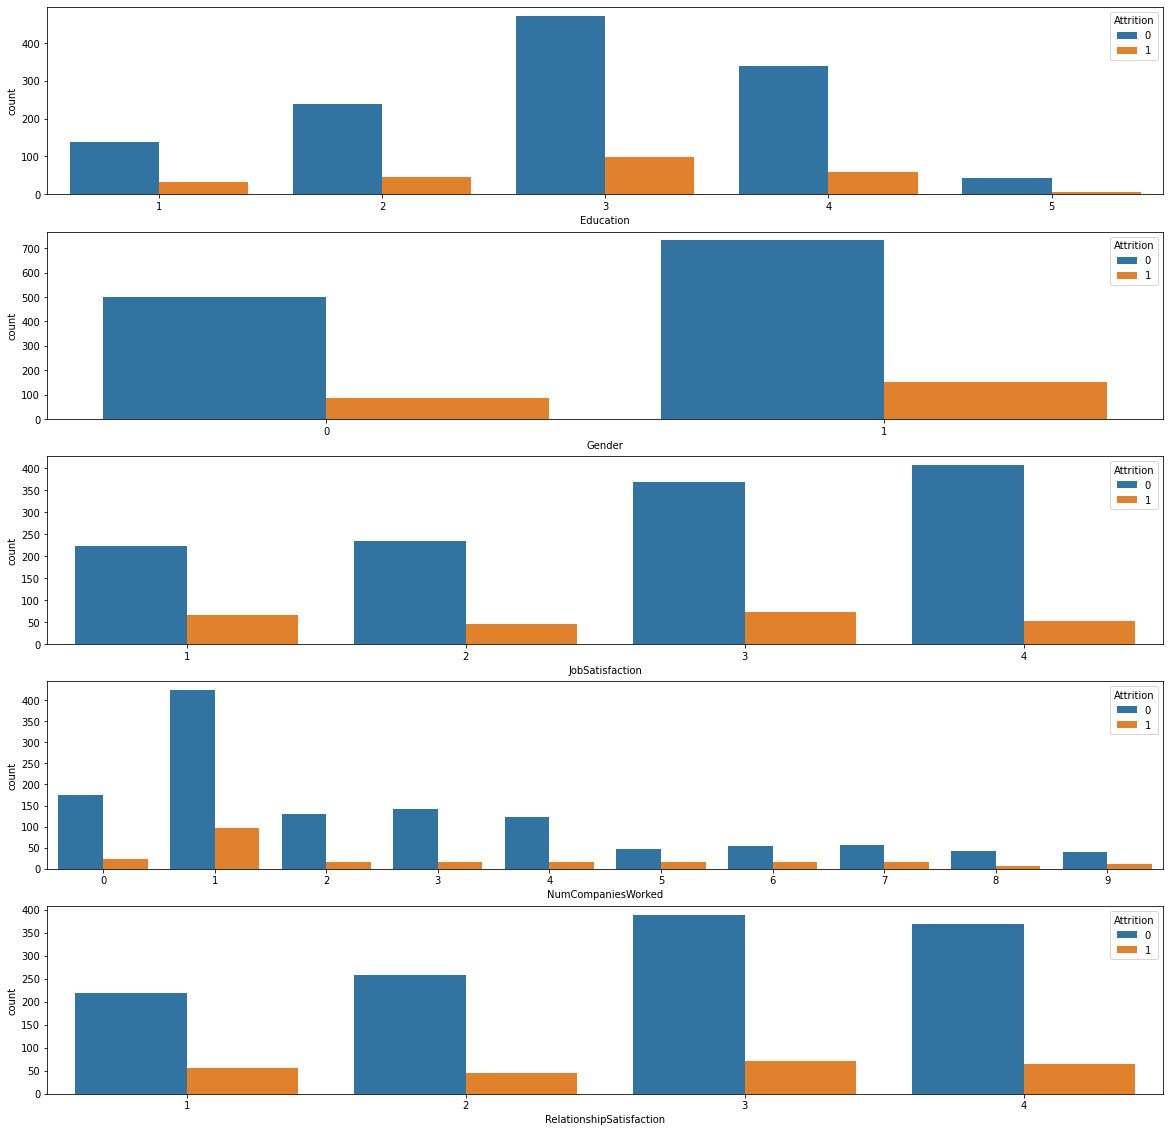

In [37]:
plt.figure(figsize=[20,20])
plt.subplot(511)
sns.countplot(x = 'Education', hue = 'Attrition', data = df)
plt.subplot(512)
sns.countplot(x = 'Gender', hue = 'Attrition', data = df)
plt.subplot(513)
sns.countplot(x = 'JobSatisfaction', hue = 'Attrition', data = df)
plt.subplot(514)
sns.countplot(x = 'NumCompaniesWorked', hue = 'Attrition', data = df)
plt.subplot(515)
sns.countplot(x = 'RelationshipSatisfaction', hue = 'Attrition', data = df)
plt.show()

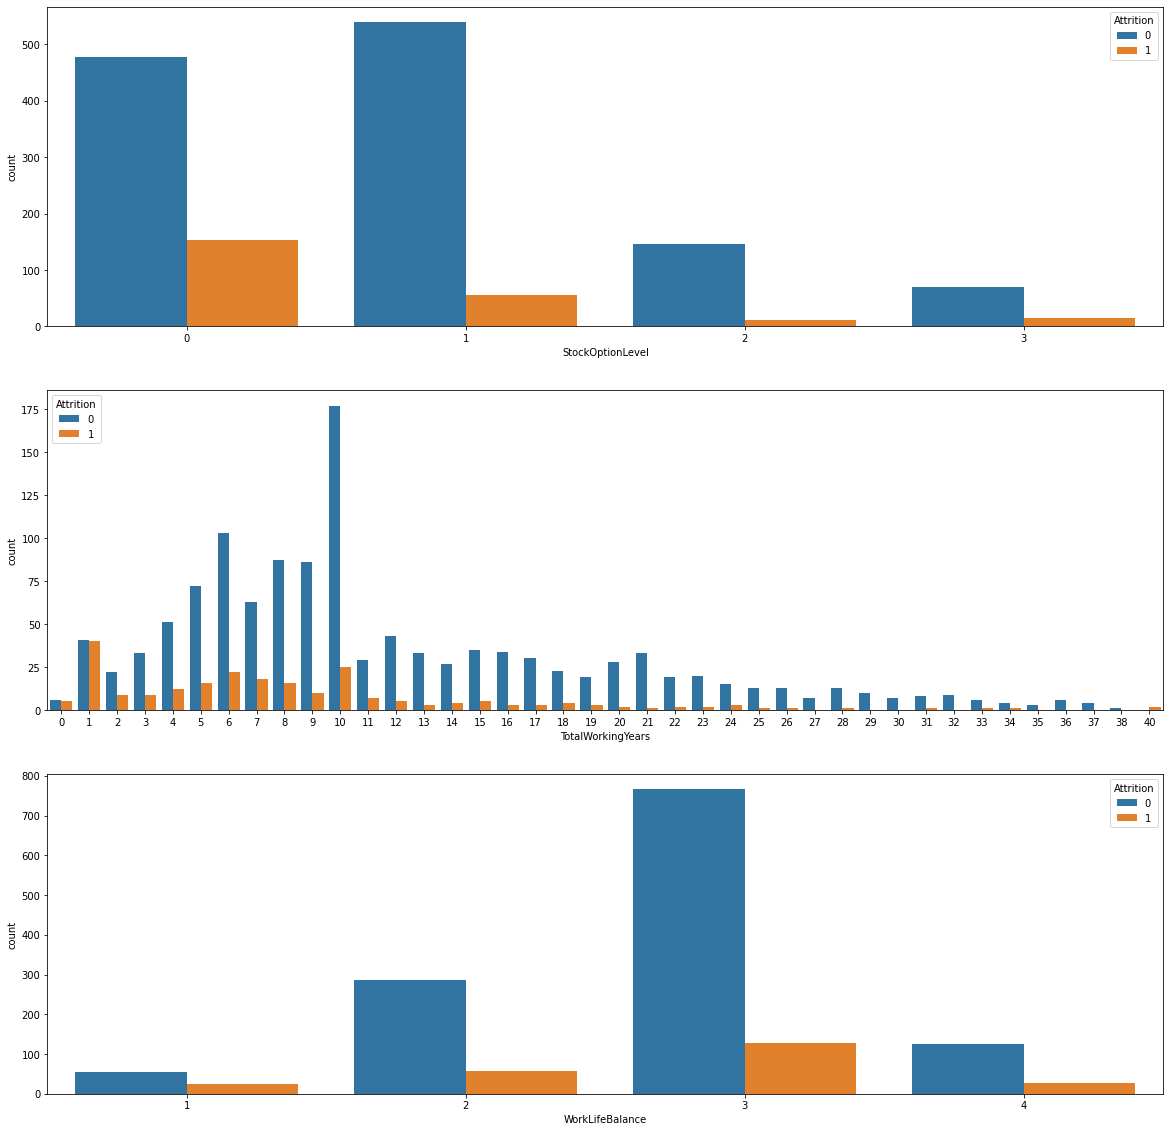

In [38]:
plt.figure(figsize=[20,20])
plt.subplot(311)
sns.countplot(x = 'StockOptionLevel', hue = 'Attrition', data = df)
plt.subplot(312)
sns.countplot(x = 'TotalWorkingYears', hue = 'Attrition', data = df)
plt.subplot(313)
sns.countplot(x = 'WorkLifeBalance', hue = 'Attrition', data = df)
plt.show()

Observation from Attrition vs. Features:

1. Age group between 18-21 has more attrition rate
2. As job satisfaction increacses, people tends to leave the company less
3. Attrition is high among employyes with Total working years 0 and 1
4. Single employees tend to leave compared to married and divorced
5. Sales Representitives tend to leave compared to any other job 
6. Less involved employees tend to leave the company 
7. Less experienced (low job level) tend to leave the company

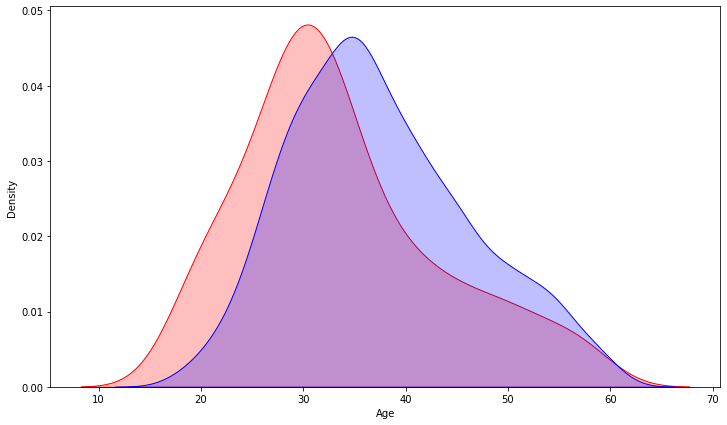

In [39]:
# Distribution of target variables among the continuous features variables

## AGE
plt.figure(figsize=(12,7))

sns.kdeplot(df_left['Age'], label = 'Employees who left', shade = True, color = 'r')
sns.kdeplot(df_stayed['Age'], label = 'Employees who Stayed', shade = True, color = 'b')

plt.xlabel('Age')
plt.show()

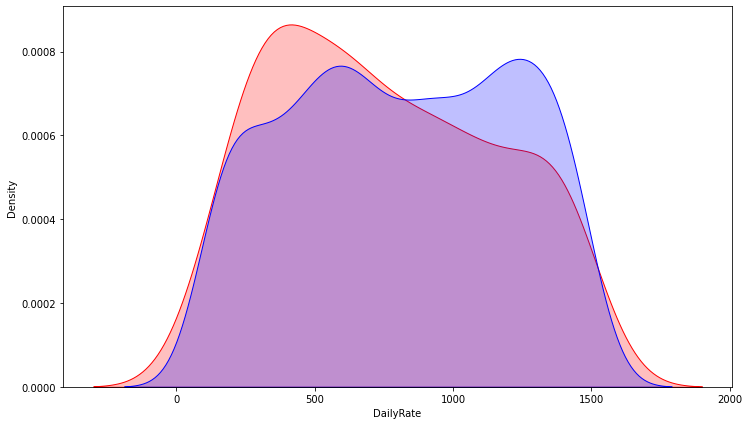

In [40]:
##DailyRate
plt.figure(figsize=(12,7))

sns.kdeplot(df_left['DailyRate'], label = 'Employees who left', shade = True, color = 'r')
sns.kdeplot(df_stayed['DailyRate'], label = 'Employees who Stayed', shade = True, color = 'b')

plt.xlabel('DailyRate')
plt.show()

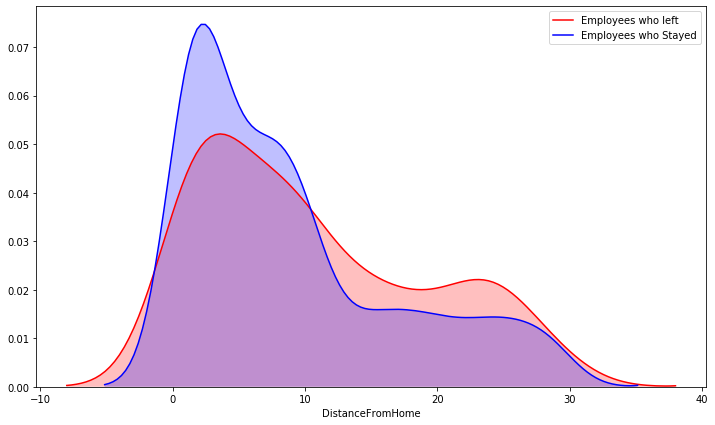

In [30]:
##DistanceFromHome
plt.figure(figsize=(12,7))

sns.kdeplot(df_left['DistanceFromHome'], label = 'Employees who left', shade = True, color = 'r')
sns.kdeplot(df_stayed['DistanceFromHome'], label = 'Employees who Stayed', shade = True, color = 'b')

plt.xlabel('DistanceFromHome')
plt.show()

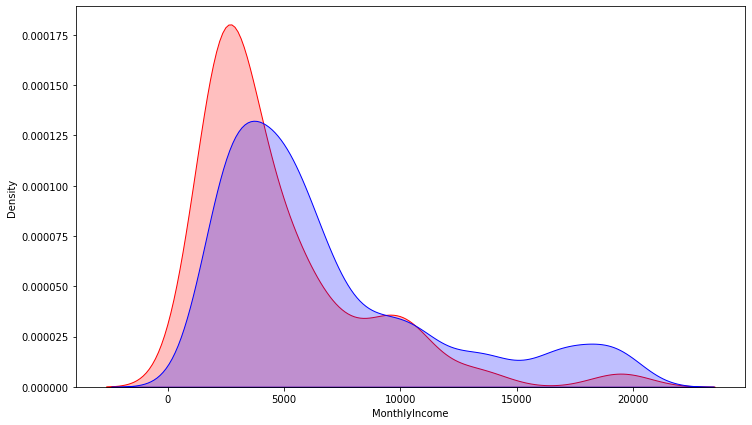

In [41]:
##MonthlyIncome
plt.figure(figsize=(12,7))

sns.kdeplot(df_left['MonthlyIncome'], label = 'Employees who left', shade = True, color = 'r')
sns.kdeplot(df_stayed['MonthlyIncome'], label = 'Employees who Stayed', shade = True, color = 'b')

plt.xlabel('MonthlyIncome')
plt.show()

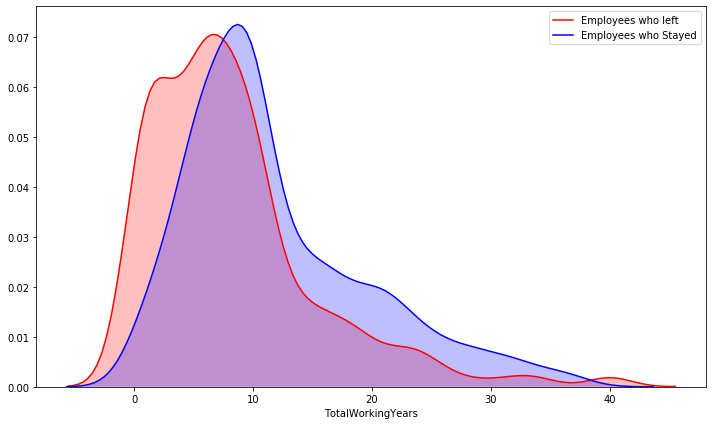

In [32]:
##TotalWorkingYears
plt.figure(figsize=(12,7))

sns.kdeplot(df_left['TotalWorkingYears'], label = 'Employees who left', shade = True, color = 'r')
sns.kdeplot(df_stayed['TotalWorkingYears'], label = 'Employees who Stayed', shade = True, color = 'b')

plt.xlabel('TotalWorkingYears')
plt.show()

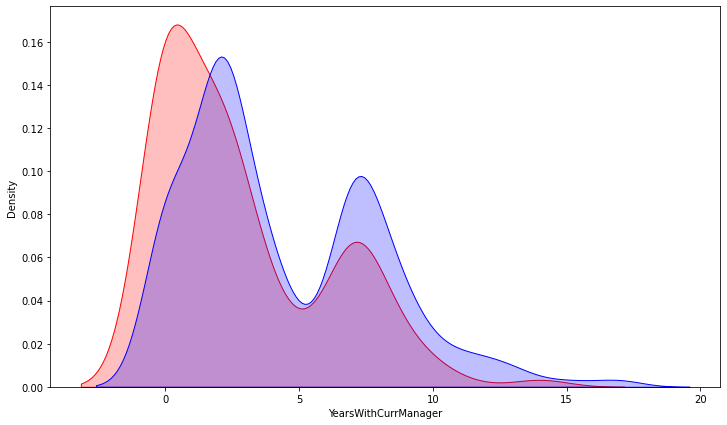

In [42]:
##YearsWithCurrManager
plt.figure(figsize=(12,7))

sns.kdeplot(df_left['YearsWithCurrManager'], label = 'Employees who left', shade = True, color = 'r')
sns.kdeplot(df_stayed['YearsWithCurrManager'], label = 'Employees who Stayed', shade = True, color = 'b')

plt.xlabel('YearsWithCurrManager')
plt.show()

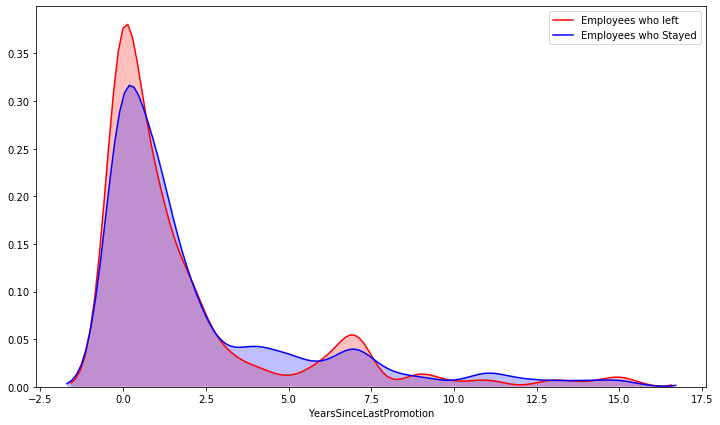

In [34]:
##YearsSinceLastPromotion
plt.figure(figsize=(12,7))

sns.kdeplot(df_left['YearsSinceLastPromotion'], label = 'Employees who left', shade = True, color = 'r')
sns.kdeplot(df_stayed['YearsSinceLastPromotion'], label = 'Employees who Stayed', shade = True, color = 'b')

plt.xlabel('YearsSinceLastPromotion')
plt.show()

Observation from Attrition vs. Continuous Features:
1. Employees with daily rate less than 550 tends to leave
2. Attrition rate is positively linked with distance
3. High attrition for employees with monthy income less than 5000
4. Till 2.5 years with current manager, the attrition rate is higher.
5. People without promotion in the period 6-7.5 years tends to leave the company 

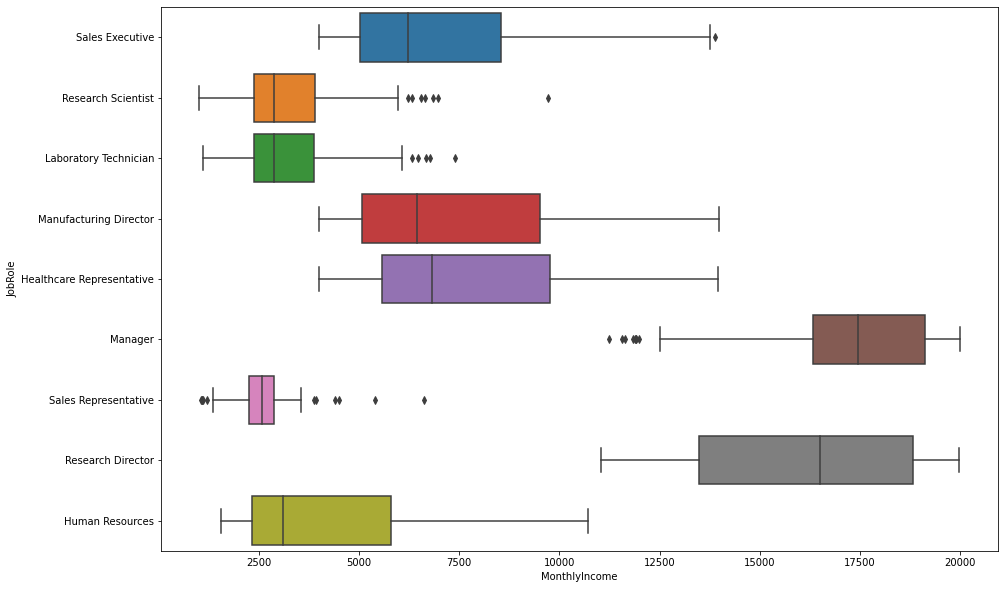

In [43]:
# Lets see the monthly income between different sectors

##Job role
plt.figure(figsize=(15, 10))
sns.boxplot(x = 'MonthlyIncome', y = 'JobRole', data = df)
plt.show()

The managers and research directors enjoy the highest salary, followed by sales executive, manufacturing and healtcare employees. The sales representatives earn the least salary.

In [49]:
df.head(4)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,2,0,3,2,7,4,2,5993,8,1,11,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,3,1,2,2,6,2,1,5130,1,0,23,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,1,2,1,2,3,2,2090,6,1,15,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,4,0,3,1,6,3,1,2909,1,1,11,3,0,8,3,3,8,7,3,0


In [48]:
# label Encoding
le = LabelEncoder()
df.BusinessTravel = le.fit_transform(df.BusinessTravel)
df.Department = le.fit_transform(df.Department)
df.EducationField = le.fit_transform(df.EducationField)
df.JobRole = le.fit_transform(df.JobRole)
df.MaritalStatus = le.fit_transform(df.MaritalStatus)

In [55]:
df.columns

Index(['Age', 'Attrition', 'DistanceFromHome', 'Education', 'Gender',
       'JobRole', 'MaritalStatus', 'MonthlyIncome', 'OverTime',
       'StockOptionLevel', 'TotalWorkingYears'],
      dtype='object')

In [51]:
# Dropping unnecessary columns
df = df.drop(['BusinessTravel','DailyRate', 'Department', 'EducationField', 'EnvironmentSatisfaction',
             'JobInvolvement', 'JobLevel','JobSatisfaction','NumCompaniesWorked','PercentSalaryHike',
             'RelationshipSatisfaction','TrainingTimesLastYear','YearsAtCompany',
       'YearsInCurrentRole','YearsWithCurrManager','WorkLifeBalance','YearsSinceLastPromotion'], axis = 1)

In [56]:
# Dependent and independent variable separation
x = df.drop(columns = "Attrition")
y = df.Attrition

In [57]:
x

,Age,DistanceFromHome,Education,Gender,JobRole,MaritalStatus,MonthlyIncome,OverTime,StockOptionLevel,TotalWorkingYears
0,41,1,2,0,7,2,5993,1,0,8
1,49,8,1,1,6,1,5130,0,1,10
2,37,2,2,1,2,2,2090,1,0,7
3,33,3,4,0,6,1,2909,1,0,8
4,27,2,1,1,2,1,3468,0,1,6
...,...,...,...,...,...,...,...,...,...,...
1465,36,23,2,1,2,1,2571,0,1,17
1466,39,6,1,1,0,1,9991,0,1,9
1467,27,4,3,1,4,1,6142,1,1,6
1468,49,2,3,1,7,1,5390,0,0,17


In [58]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [59]:
# Multicollinearity check

## VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = x.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(x.values, i)
                          for i in range(len(x.columns))]
  
print(vif_data)

             feature        VIF
0                Age  20.733979
1   DistanceFromHome   2.240393
2          Education   8.760692
3             Gender   2.371478
4            JobRole   4.022459
5      MaritalStatus   4.655094
6      MonthlyIncome   7.173296
7           OverTime   1.393139
8   StockOptionLevel   2.856865
9  TotalWorkingYears  10.296338


In [60]:
# Since VIF more high for few variables, thus needs scaling
scalar = StandardScaler()
x_scaled = scalar.fit_transform(x)

In [61]:
# VIF check after scaling
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns

vif

,vif,Features
0,1.921052,Age
1,1.004676,DistanceFromHome
2,1.050037,Education
3,1.009345,Gender
4,1.032478,JobRole
5,1.821004,MaritalStatus
6,2.502422,MonthlyIncome
7,1.006561,OverTime
8,1.798589,StockOptionLevel
9,3.523075,TotalWorkingYears


In [62]:
# Train test split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y, test_size= 0.70, random_state = 101)

## MODEL BUILDING

### 1. Logistic Regression

In [63]:
model_log = LogisticRegression()
model_log.fit(x_train , y_train)
a = model_log.score(x_train, y_train)
print("                 LOGISTIC MODEL           ")
print("                                          ")
print(f"Model accuracy on train dataset : {round(a,2)}")

y_pred = model_log.predict(x_test)
b = accuracy_score(y_test, y_pred)
print(f"Model accuracy on test data:      {round(b,2)}")
print("---------"*10)

c = confusion_matrix(y_test, y_pred)
print(f"The confusion martix is: \n {c}")
print("---------"*10)

d = classification_report(y_test, y_pred)
print(f"The classification report of the model: \n {d}")


                 LOGISTIC MODEL           
                                          
Model accuracy on train dataset : 0.89
Model accuracy on test data:      0.83
------------------------------------------------------------------------------------------
The confusion martix is: 
 [[843   5]
 [166  15]]
------------------------------------------------------------------------------------------
The classification report of the model: 
               precision    recall  f1-score   support

           0       0.84      0.99      0.91       848
           1       0.75      0.08      0.15       181

    accuracy                           0.83      1029
   macro avg       0.79      0.54      0.53      1029
weighted avg       0.82      0.83      0.77      1029



### 2. Support Vector Machine(SVC)

In [64]:
model_svc = SVC()
model_svc.fit(x_train , y_train)
a = model_svc.score(x_train, y_train)
print("                 SUPPORT VECTOR CALSSIFIER MODEL           ")
print("                                          ")
print(f"Model accuracy on train dataset : {round(a,2)}")

y_pred = model_svc.predict(x_test)
b = accuracy_score(y_test, y_pred)
print(f"Model accuracy on test data:      {round(b,2)}")
print("---------"*10)

c = confusion_matrix(y_test, y_pred)
print(f"The confusion martix is: \n {c}")
print("---------"*10)

d = classification_report(y_test, y_pred)
print(f"The classification report of the model: \n {d}")

                 SUPPORT VECTOR CALSSIFIER MODEL           
                                          
Model accuracy on train dataset : 0.9
Model accuracy on test data:      0.83
------------------------------------------------------------------------------------------
The confusion martix is: 
 [[843   5]
 [165  16]]
------------------------------------------------------------------------------------------
The classification report of the model: 
               precision    recall  f1-score   support

           0       0.84      0.99      0.91       848
           1       0.76      0.09      0.16       181

    accuracy                           0.83      1029
   macro avg       0.80      0.54      0.53      1029
weighted avg       0.82      0.83      0.78      1029



In [65]:
model_svc1 = SVC(C = 0.75)
model_svc1.fit(x_train , y_train)
a = model_svc1.score(x_train, y_train)
print("                 SUPPORT VECTOR CALSSIFIER MODEL WITH REGULARISATION         ")
print("                                          ")
print(f"Model accuracy on train dataset : {round(a,2)}")

y_pred = model_svc1.predict(x_test)
b = accuracy_score(y_test, y_pred)
print(f"Model accuracy on test data:      {round(b,2)}")
print("---------"*10)

c = confusion_matrix(y_test, y_pred)
print(f"The confusion martix is: \n {c}")
print("---------"*10)

d = classification_report(y_test, y_pred)
print(f"The classification report of the model: \n {d}")

                 SUPPORT VECTOR CALSSIFIER MODEL WITH REGULARISATION         
                                          
Model accuracy on train dataset : 0.89
Model accuracy on test data:      0.83
------------------------------------------------------------------------------------------
The confusion martix is: 
 [[846   2]
 [170  11]]
------------------------------------------------------------------------------------------
The classification report of the model: 
               precision    recall  f1-score   support

           0       0.83      1.00      0.91       848
           1       0.85      0.06      0.11       181

    accuracy                           0.83      1029
   macro avg       0.84      0.53      0.51      1029
weighted avg       0.84      0.83      0.77      1029



### 3. Naive Bayes

In [66]:
model_nbg = GaussianNB()
model_nbg.fit(x_train , y_train)
a = model_nbg.score(x_train, y_train)
print("                 NAIVE BAYES(Gaussian) MODEL           ")
print("                                          ")
print(f"Model accuracy on train dataset : {round(a,2)}")

y_pred = model_nbg.predict(x_test)
b = accuracy_score(y_test, y_pred)
print(f"Model accuracy on test data:      {round(b,2)}")
print("---------"*10)

c = confusion_matrix(y_test, y_pred)
print(f"The confusion martix is: \n {c}")
print("---------"*10)

d = classification_report(y_test, y_pred)
print(f"The classification report of the model: \n {d}")

                 NAIVE BAYES(Gaussian) MODEL           
                                          
Model accuracy on train dataset : 0.86
Model accuracy on test data:      0.83
------------------------------------------------------------------------------------------
The confusion martix is: 
 [[787  61]
 [119  62]]
------------------------------------------------------------------------------------------
The classification report of the model: 
               precision    recall  f1-score   support

           0       0.87      0.93      0.90       848
           1       0.50      0.34      0.41       181

    accuracy                           0.83      1029
   macro avg       0.69      0.64      0.65      1029
weighted avg       0.80      0.83      0.81      1029



In [67]:
model_nbb = BernoulliNB()
model_nbb.fit(x_train , y_train)
a = model_nbb.score(x_train, y_train)
print("                 NAIVE BAYES(Bernoulli) MODEL           ")
print("                                          ")
print(f"Model accuracy on train dataset : {round(a,2)}")

y_pred = model_nbb.predict(x_test)
b = accuracy_score(y_test, y_pred)
print(f"Model accuracy on test data:      {round(b,2)}")
print("---------"*10)

c = confusion_matrix(y_test, y_pred)
print(f"The confusion martix is: \n {c}")
print("---------"*10)

d = classification_report(y_test, y_pred)
print(f"The classification report of the model: \n {d}")

                 NAIVE BAYES(Bernoulli) MODEL           
                                          
Model accuracy on train dataset : 0.86
Model accuracy on test data:      0.82
------------------------------------------------------------------------------------------
The confusion martix is: 
 [[810  38]
 [143  38]]
------------------------------------------------------------------------------------------
The classification report of the model: 
               precision    recall  f1-score   support

           0       0.85      0.96      0.90       848
           1       0.50      0.21      0.30       181

    accuracy                           0.82      1029
   macro avg       0.67      0.58      0.60      1029
weighted avg       0.79      0.82      0.79      1029



### 4. KNN Classifier

In [68]:
model_knn = KNeighborsClassifier()
model_knn.fit(x_train , y_train)
a = model_knn.score(x_train, y_train)
print("                      KNN MODEL           ")
print("                                          ")
print(f"Model accuracy on train dataset : {round(a,2)}")

y_pred = model_knn.predict(x_test)
b = accuracy_score(y_test, y_pred)
print(f"Model accuracy on test data:      {round(b,2)}")
print("---------"*10)

c = confusion_matrix(y_test, y_pred)
print(f"The confusion martix is: \n {c}")
print("---------"*10)

d = classification_report(y_test, y_pred)
print(f"The classification report of the model: \n {d}")

                      KNN MODEL           
                                          
Model accuracy on train dataset : 0.91
Model accuracy on test data:      0.84
------------------------------------------------------------------------------------------
The confusion martix is: 
 [[834  14]
 [151  30]]
------------------------------------------------------------------------------------------
The classification report of the model: 
               precision    recall  f1-score   support

           0       0.85      0.98      0.91       848
           1       0.68      0.17      0.27       181

    accuracy                           0.84      1029
   macro avg       0.76      0.57      0.59      1029
weighted avg       0.82      0.84      0.80      1029



In [69]:
# To increase the model accuracy, lets hyperparameter tune the model
param_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,20,25,27,30,32,34],
               'n_neighbors' : [3,5,7,9,10,11,12,13]
              }

gridsearch = GridSearchCV(estimator = model_knn,param_grid= param_grid,verbose=3)

gridsearch.fit(x_train,y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.876, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.864, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.875, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.795, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.909, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.865, total=   0.0s
[CV] algorith

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=9, score=0.864, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=9, score=0.875, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=9, score=0.875, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=10, score=0.854, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=10, score=0.875, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=10, score=0.875, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=10 ...............
[

[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=13, score=0.864, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=13 ...............
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=13, score=0.875, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=20, n_neighbors=13 ...............
[CV]  algorithm=ball_tree, leaf_size=20, n_neighbors=13, score=0.875, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=3, score=0.876, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=3, score=0.864, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=3, score=0.875, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=25, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=25, n_neighbors=3, score=0.795, tota

[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=9, score=0.875, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=9, score=0.875, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=10, score=0.854, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=10, score=0.875, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=10, score=0.875, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=10, score=0.875, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=27, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=27, n_neighbors=10, score=0.875, to

[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=12, score=0.864, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=12 ...............
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=12, score=0.875, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=12 ...............
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=12, score=0.875, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=13 ...............
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=13, score=0.843, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=13 ...............
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=13, score=0.875, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=13 ...............
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=13, score=0.864, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=30, n_neighbors=13 ...............
[CV]  algorithm=ball_tree, leaf_size=30, n_neighbors=13, score=0.875, 

[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=9, score=0.864, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=9, score=0.875, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=9, score=0.875, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=10, score=0.854, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=10, score=0.875, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=10, score=0.875, total=   0.0s
[CV] algorithm=ball_tree, leaf_size=34, n_neighbors=10 ...............
[CV]  algorithm=ball_tree, leaf_size=34, n_neighbors=10, score=0.875, tot

[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=3, score=0.876, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=3, score=0.864, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=3, score=0.875, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=3, score=0.795, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=3, score=0.909, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=5, score=0.865, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=20, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=20, n_neighbors=5, score=0.898, total=   0.0s
[CV] al

[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=10, score=0.875, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=11, score=0.854, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=11, score=0.875, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=11, score=0.864, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=11, score=0.875, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=11, score=0.875, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=12, score=0.843, total=   0.0s


[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=3, score=0.795, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=3, score=0.909, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=5, score=0.865, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=5, score=0.898, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=5, score=0.875, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=5, score=0.852, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=30, n_neighbors=5 ..................
[CV]  algorithm=kd_tree, leaf_size=30, n_neighbors=5, score=0.898, total=   0.0s
[CV] al

[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=11, score=0.875, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=11, score=0.864, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=11, score=0.875, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=11, score=0.875, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=12, score=0.843, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=12, score=0.875, total=   0.0s
[CV] algorithm=kd_tree, leaf_size=32, n_neighbors=12 .................
[CV]  algorithm=kd_tree, leaf_size=32, n_neighbors=12, score=0.864, total=   0.0s


[CV] algorithm=brute, leaf_size=18, n_neighbors=5 ....................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=5, score=0.898, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=7, score=0.854, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=7, score=0.886, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=7, score=0.886, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=7, score=0.864, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=18, n_neighbors=7, score=0.898, total=   0.0s
[CV] algorithm=brute, leaf_size=18, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_s

[CV]  algorithm=brute, leaf_size=20, n_neighbors=11, score=0.875, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=12, score=0.843, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=12, score=0.875, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=12, score=0.864, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=12, score=0.875, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=12, score=0.875, total=   0.0s
[CV] algorithm=brute, leaf_size=20, n_neighbors=13 ...................
[CV]  algorithm=brute, leaf_size=20, n_neighbors=13, score=0.843, total=   0.0s
[CV] algorithm

[CV]  algorithm=brute, leaf_size=27, n_neighbors=7, score=0.898, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=9, score=0.843, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=9, score=0.886, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=9, score=0.864, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=9, score=0.875, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=9, score=0.875, total=   0.0s
[CV] algorithm=brute, leaf_size=27, n_neighbors=10 ...................
[CV]  algorithm=brute, leaf_size=27, n_neighbors=10, score=0.854, total=   0.0s
[CV] algorithm=brute

[CV]  algorithm=brute, leaf_size=30, n_neighbors=13, score=0.875, total=   0.0s
[CV] algorithm=brute, leaf_size=30, n_neighbors=13 ...................
[CV]  algorithm=brute, leaf_size=30, n_neighbors=13, score=0.875, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=3, score=0.876, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=3, score=0.864, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=3, score=0.875, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=3, score=0.795, total=   0.0s
[CV] algorithm=brute, leaf_size=32, n_neighbors=3 ....................
[CV]  algorithm=brute, leaf_size=32, n_neighbors=3, score=0.909, total=   0.0s
[CV] algorithm=brut

[CV]  algorithm=brute, leaf_size=34, n_neighbors=11, score=0.854, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=11, score=0.875, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=11, score=0.864, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=11, score=0.875, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=11 ...................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=11, score=0.875, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=12, score=0.843, total=   0.0s
[CV] algorithm=brute, leaf_size=34, n_neighbors=12 ...................
[CV]  algorithm=brute, leaf_size=34, n_neighbors=12, score=0.875, total=   0.0s
[CV] algorithm

[Parallel(n_jobs=1)]: Done 840 out of 840 | elapsed:   10.1s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [18, 20, 25, 27, 30, 32, 34],
                         'n_neighbors': [3, 5, 7, 9, 10, 11, 12, 13]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [70]:
# Best parameter according to the grid search
gridsearch.best_params_

{'algorithm': 'ball_tree', 'leaf_size': 18, 'n_neighbors': 7}

In [85]:
# Using the best parameters as per the grid search
model_knn1 = KNeighborsClassifier(algorithm= 'ball_tree', leaf_size= 18, n_neighbors= 7)
model_knn1.fit(x_train , y_train)
a = model_knn1.score(x_train, y_train)
print("                      KNN MODEL WITH HYPERPARAMETERS TUNING     ")
print("                                          ")
print(f"Model accuracy on train dataset : {round(a,2)}")

y_pred = model_knn1.predict(x_test)
b = accuracy_score(y_test, y_pred)
print(f"Model accuracy on test data:      {round(b,2)}")
print("---------"*10)

c = confusion_matrix(y_test, y_pred)
print(f"The confusion martix is: \n {c}")
print("---------"*10)

d = classification_report(y_test, y_pred)
print(f"The classification report of the model: \n {d}")

                      KNN MODEL WITH HYPERPARAMETERS TUNING     
                                          
Model accuracy on train dataset : 0.87
Model accuracy on test data:      0.86
------------------------------------------------------------------------------------------
The confusion martix is: 
 [[103   5]
 [ 12   2]]
------------------------------------------------------------------------------------------
The classification report of the model: 
               precision    recall  f1-score   support

           0       0.90      0.95      0.92       108
           1       0.29      0.14      0.19        14

    accuracy                           0.86       122
   macro avg       0.59      0.55      0.56       122
weighted avg       0.83      0.86      0.84       122



In [72]:
# Lets use kfold validation to check how our model is generalising over the entire dataset
kfold = KFold(n_splits=12,random_state= 42)
kfold.get_n_splits(x_scaled)

F:\SOFTWARES\Installed files\PYTHON\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


12

In [86]:
from statistics import mean
model_knn1 = KNeighborsClassifier(algorithm= 'ball_tree', leaf_size= 18, n_neighbors= 7)
cnt =0
count=[]
train_score =[]
test_score = []
for train_index,test_index in kfold.split(x_scaled):
    x_train, x_test = x_scaled[train_index], x_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model_knn1.fit(x_train,y_train)
    train_score_ = model_knn1.score(x_train,y_train)
    test_score_ =  model_knn1.score(x_test,y_test)
    cnt+=1
    count.append(cnt)
    train_score.append(train_score_)
    test_score.append(test_score_)
    
    print("for k = ", cnt)
    print(f"train_score is : {round(train_score_,3)} and test score is :  {round(test_score_,3)}")
print("************************************************")
print("************************************************")
print(f"Average train score is : {round(mean(train_score),2)}")
print(f"Average test score is :  {round(mean(train_score),2)}")

for k =  1
train_score is : 0.869 and test score is :  0.821
for k =  2
train_score is : 0.865 and test score is :  0.854
for k =  3
train_score is : 0.866 and test score is :  0.886
for k =  4
train_score is : 0.864 and test score is :  0.87
for k =  5
train_score is : 0.872 and test score is :  0.837
for k =  6
train_score is : 0.867 and test score is :  0.837
for k =  7
train_score is : 0.873 and test score is :  0.787
for k =  8
train_score is : 0.866 and test score is :  0.836
for k =  9
train_score is : 0.869 and test score is :  0.852
for k =  10
train_score is : 0.866 and test score is :  0.877
for k =  11
train_score is : 0.866 and test score is :  0.844
for k =  12
train_score is : 0.868 and test score is :  0.861
************************************************
************************************************
Average train score is : 0.87
Average test score is :  0.87


In [55]:
# Thus for k=3, the test result is the highest.
# The average test score is 87%, thus using kfold cross validation we can say that our model is
## generalising in dataset with accuracy of 87%

### 5. Decision Tree

In [74]:
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train , y_train)
a = model_dt.score(x_train, y_train)
print("                 DECISION TREE MODEL           ")
print("                                          ")
print(f"Model accuracy on train dataset : {round(a,2)}")

y_pred = model_dt.predict(x_test)
b = accuracy_score(y_test, y_pred)
print(f"Model accuracy on test data:      {round(b,2)}")
print("---------"*10)

c = confusion_matrix(y_test, y_pred)
print(f"The confusion martix is: \n {c}")
print("---------"*10)

d = classification_report(y_test, y_pred)
print(f"The classification report of the model: \n {d}")

                 DECISION TREE MODEL           
                                          
Model accuracy on train dataset : 1.0
Model accuracy on test data:      0.84
------------------------------------------------------------------------------------------
The confusion martix is: 
 [[97 11]
 [ 9  5]]
------------------------------------------------------------------------------------------
The classification report of the model: 
               precision    recall  f1-score   support

           0       0.92      0.90      0.91       108
           1       0.31      0.36      0.33        14

    accuracy                           0.84       122
   macro avg       0.61      0.63      0.62       122
weighted avg       0.85      0.84      0.84       122



In [75]:
# Using Gridsearch to improve the decision tree model
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [76]:
grid_search = GridSearchCV(estimator=model_dt,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [77]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [78]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'entropy', 'max_depth': 22, 'min_samples_leaf': 9, 'min_samples_split': 5, 'splitter': 'random'}


In [79]:
grid_search.best_score_

0.8560704942861077

In [80]:
model_dt1 = DecisionTreeClassifier(criterion = 'entropy', max_depth=22, min_samples_leaf=9,
                                   min_samples_split = 5, splitter = 'random')
model_dt1.fit(x_train , y_train)
a = model_dt1.score(x_train, y_train)
print("                 DECISION TREE MODEL WITH HYPERPARAMETER TUNING           ")
print("                                          ")
print(f"Model accuracy on train dataset : {round(a,2)}")

y_pred = model_dt1.predict(x_test)
b = accuracy_score(y_test, y_pred)
print(f"Model accuracy on test data:      {round(b,2)}")
print("---------"*10)

c = confusion_matrix(y_test, y_pred)
print(f"The confusion martix is: \n {c}")
print("---------"*10)

d = classification_report(y_test, y_pred)
print(f"The classification report of the model: \n {d}")

                 DECISION TREE MODEL WITH HYPERPARAMETER TUNING           
                                          
Model accuracy on train dataset : 0.86
Model accuracy on test data:      0.84
------------------------------------------------------------------------------------------
The confusion martix is: 
 [[100   8]
 [ 12   2]]
------------------------------------------------------------------------------------------
The classification report of the model: 
               precision    recall  f1-score   support

           0       0.89      0.93      0.91       108
           1       0.20      0.14      0.17        14

    accuracy                           0.84       122
   macro avg       0.55      0.53      0.54       122
weighted avg       0.81      0.84      0.82       122



### 6.Random Forest ( Bagging)

In [81]:
model_rf = RandomForestClassifier()
model_rf.fit(x_train , y_train)
a = model_rf.score(x_train, y_train)
print("                 RANDOM FOREST MODEL           ")
print("                                          ")
print(f"Model accuracy on train dataset : {round(a,2)}")

y_pred = model_rf.predict(x_test)
b = accuracy_score(y_test, y_pred)
print(f"Model accuracy on test data:      {round(b,2)}")
print("---------"*10)

c = confusion_matrix(y_test, y_pred)
print(f"The confusion martix is: \n {c}")
print("---------"*10)

d = classification_report(y_test, y_pred)
print(f"The classification report of the model: \n {d}")

                 RANDOM FOREST MODEL           
                                          
Model accuracy on train dataset : 1.0
Model accuracy on test data:      0.9
------------------------------------------------------------------------------------------
The confusion martix is: 
 [[105   3]
 [  9   5]]
------------------------------------------------------------------------------------------
The classification report of the model: 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95       108
           1       0.62      0.36      0.45        14

    accuracy                           0.90       122
   macro avg       0.77      0.66      0.70       122
weighted avg       0.89      0.90      0.89       122



### 7. Ada Boost (Boosting)

In [82]:
model_ada = AdaBoostClassifier(base_estimator= model_dt)
model_ada.fit(x_train , y_train)
a = model_ada.score(x_train, y_train)
print("                 Adaptive Boost Model           ")
print("                                          ")
print(f"Model accuracy on train dataset : {round(a,2)}")

y_pred = model_ada.predict(x_test)
b = accuracy_score(y_test, y_pred)
print(f"Model accuracy on test data:      {round(b,2)}")
print("---------"*10)

c = confusion_matrix(y_test, y_pred)
print(f"The confusion martix is: \n {c}")
print("---------"*10)

d = classification_report(y_test, y_pred)
print(f"The classification report of the model: \n {d}")

                 Adaptive Boost Model           
                                          
Model accuracy on train dataset : 1.0
Model accuracy on test data:      0.82
------------------------------------------------------------------------------------------
The confusion martix is: 
 [[95 13]
 [ 9  5]]
------------------------------------------------------------------------------------------
The classification report of the model: 
               precision    recall  f1-score   support

           0       0.91      0.88      0.90       108
           1       0.28      0.36      0.31        14

    accuracy                           0.82       122
   macro avg       0.60      0.62      0.60       122
weighted avg       0.84      0.82      0.83       122



In [83]:
model_ada1 = AdaBoostClassifier(base_estimator= model_dt1)
model_ada1.fit(x_train , y_train)
a = model_ada1.score(x_train, y_train)
print("    Adaptive Boost Model with Hyperparameterized Decision tree as the base model  ")
print("                                          ")
print(f"Model accuracy on train dataset : {round(a,2)}")

y_pred = model_ada1.predict(x_test)
b = accuracy_score(y_test, y_pred)
print(f"Model accuracy on test data:      {round(b,2)}")
print("---------"*10)

c = confusion_matrix(y_test, y_pred)
print(f"The confusion martix is: \n {c}")
print("---------"*10)

d = classification_report(y_test, y_pred)
print(f"The classification report of the model: \n {d}")

    Adaptive Boost Model with Hyperparameterized Decision tree as the base model  
                                          
Model accuracy on train dataset : 1.0
Model accuracy on test data:      0.84
------------------------------------------------------------------------------------------
The confusion martix is: 
 [[99  9]
 [11  3]]
------------------------------------------------------------------------------------------
The classification report of the model: 
               precision    recall  f1-score   support

           0       0.90      0.92      0.91       108
           1       0.25      0.21      0.23        14

    accuracy                           0.84       122
   macro avg       0.57      0.57      0.57       122
weighted avg       0.83      0.84      0.83       122



### 8. Gradient Boost( Boosting)

In [84]:
model_gbost = GradientBoostingClassifier()
model_gbost.fit(x_train , y_train)
a = model_gbost.score(x_train, y_train)
print("                 Gradient Boost Model           ")
print("                                          ")
print(f"Model accuracy on train dataset : {round(a,2)}")

y_pred = model_gbost.predict(x_test)
b = accuracy_score(y_test, y_pred)
print(f"Model accuracy on test data:      {round(b,2)}")
print("---------"*10)

c = confusion_matrix(y_test, y_pred)
print(f"The confusion martix is: \n {c}")
print("---------"*10)

d = classification_report(y_test, y_pred)
print(f"The classification report of the model: \n {d}")

                 Gradient Boost Model           
                                          
Model accuracy on train dataset : 0.91
Model accuracy on test data:      0.89
------------------------------------------------------------------------------------------
The confusion martix is: 
 [[104   4]
 [  9   5]]
------------------------------------------------------------------------------------------
The classification report of the model: 
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       108
           1       0.56      0.36      0.43        14

    accuracy                           0.89       122
   macro avg       0.74      0.66      0.69       122
weighted avg       0.88      0.89      0.88       122



The random forest(model_rf) is the best model with highest test score, precision, recall and F1-score. This model will be used for final deployment.

In [89]:
# Saving the best model
pickle.dump(model_rf, open('model.pkl','wb'))
model=pickle.load(open('model.pkl','rb'))